In [1]:
import re
import collections
import nltk.tokenize
import numpy
import pandas
import pickle
import seaborn
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import TweetTokenizer


In [4]:

tk = TweetTokenizer()

with open('../data/offensive/train_text.txt', 'r') as f2:
    line = f2.read()

tokens = tk.tokenize(line)
  


In [5]:
#Tokens
toklen = len(tokens)
print(toklen)

301224


In [6]:
#TYPES
cnt = Counter()
typetokens = len(Counter(tokens))
print(typetokens)

24653


In [7]:
#type/tokenratio
print(typetokens/toklen)


0.0818427482537912


In [8]:
with open('../data/sentiment/train_text.txt', 'r') as f3:
    datasen = f3.read()
tokensen = tk.tokenize(datasen)


In [9]:
#Tokens
toklen1 = len(tokensen)
print(toklen1)

1032731


In [10]:
#TYPES
typetokens1 = len(Counter(tokensen))
print(typetokens1)

62256


In [11]:
#type/tokenratio
print(typetokens1/toklen1)


0.06028288102129209


In [12]:
with open('../data/GreatGatsby.txt', 'r') as f4:
    line1 = f4.read()

tokens2 = tk.tokenize(line1)


In [13]:
toklen2 = len(tokens2)
print(toklen2)

64835


In [14]:
#TYPES
typetokens2 = len(Counter(tokens2))
print(typetokens2)

6833


In [15]:
#type/tokenratio
print(typetokens2/toklen2)


0.10539060692527184


In [16]:
#OFFENSIVE
with open('../data/offensive/train_text.txt', 'r') as f2:
    line = f2.read()

# Initialise lists
tokens = []
unmatchable = []

# Compile patterns for speedup
token_pat = re.compile(r'\w+')
skippable_pat = re.compile(r'\s+')  # typically spaces

# As long as there's any material left...
while line:
    # Try finding a skippable token delimiter first.
    skippable_match = re.search(skippable_pat, line)
    if skippable_match and skippable_match.start() == 0:
        # If there is one at the beginning of the line, just skip it.
        line = line[skippable_match.end():]
    else:
        # Else try finding a real token.
        token_match = re.search(token_pat, line)
        if token_match and token_match.start() == 0:
            # If there is one at the beginning of the line, tokenise it.
            tokens.append(line[:token_match.end()])
            line = line[token_match.end():]
        else:
            # Else there is unmatchable material here.
            # It ends where a skippable or token match starts, or at the end of the line.
            unmatchable_end = len(line)
            if skippable_match:
                unmatchable_end = skippable_match.start()
            if token_match:
                unmatchable_end = min(unmatchable_end, token_match.start())
            # Add it to unmatchable and discard from line.
            unmatchable.append(line[:unmatchable_end])
            line = line[unmatchable_end:]

print(len(tokens))
print(len(unmatchable))

267520
69920


In [17]:
Counter(tokens).most_common(20)

[('user', 29812),
 ('the', 7271),
 ('is', 5656),
 ('to', 5472),
 ('a', 4582),
 ('and', 4106),
 ('you', 3683),
 ('of', 3347),
 ('are', 3076),
 ('I', 3075),
 ('that', 2369),
 ('in', 2321),
 ('s', 2170),
 ('for', 2153),
 ('t', 2018),
 ('it', 1828),
 ('he', 1681),
 ('on', 1475),
 ('she', 1421),
 ('with', 1299)]

In [18]:
#Sentiment
with open('../data/sentiment/train_text.txt', 'r') as f3:
    datasen = f3.read()

# Initialise lists
tokens1 = []
unmatchable1 = []

# Compile patterns for speedup
token_pat1 = re.compile(r'\w+')
skippable_pat1 = re.compile(r'\s+')  # typically spaces

# As long as there's any material left...
while datasen:
    # Try finding a skippable token delimiter first.
    skippable_match1 = re.search(skippable_pat1, datasen)
    if skippable_match1 and skippable_match1.start() == 0:
        # If there is one at the beginning of the line, just skip it.
        datasen = datasen[skippable_match1.end():]
    else:
        # Else try finding a real token.
        token_match1 = re.search(token_pat1, datasen)
        if token_match1 and token_match1.start() == 0:
            # If there is one at the beginning of the line, tokenise it.
            tokens1.append(datasen[:token_match1.end()])
            datasen = datasen[token_match1.end():]
        else:
            # Else there is unmatchable material here.
            # It ends where a skippable or token match starts, or at the end of the line.
            unmatchable_end1 = len(datasen)
            if skippable_match1:
                unmatchable_end1 = skippable_match1.start()
            if token_match1:
                unmatchable_end1 = min(unmatchable_end1, token_match1.start())
            # Add it to unmatchable and discard from line.
            unmatchable1.append(datasen[:unmatchable_end1])
            datasen = datasen[unmatchable_end1:]

print(len(tokens1))
print(len(unmatchable1))

906399
185127


In [19]:
Counter(tokens1).most_common(20)

[('the', 34873),
 ('to', 20673),
 ('user', 16840),
 ('I', 15273),
 ('in', 13130),
 ('on', 12573),
 ('a', 12202),
 ('and', 12015),
 ('of', 10683),
 ('for', 9669),
 ('is', 9269),
 ('s', 8499),
 ('you', 7939),
 ('it', 7700),
 ('with', 7352),
 ('be', 7096),
 ('at', 6902),
 ('tomorrow', 6664),
 ('may', 5625),
 ('that', 4607)]

In [20]:
#GREATGATSBY
with open('../data/GreatGatsby.txt', 'r') as f4:
    line1 = f4.read()

# Initialise lists
tokens2 = []
unmatchable2 = []

# Compile patterns for speedup
token_pat2 = re.compile(r'\w+')
skippable_pat2 = re.compile(r'\s+')  # typically spaces

# As long as there's any material left...
while line1:
    # Try finding a skippable token delimiter first.
    skippable_match2 = re.search(skippable_pat2, line1)
    if skippable_match2 and skippable_match2.start() == 0:
        # If there is one at the beginning of the line, just skip it.
        line1 = line1[skippable_match2.end():]
    else:
        # Else try finding a real token.
        token_match2 = re.search(token_pat2, line1)
        if token_match2 and token_match2.start() == 0:
            # If there is one at the beginning of the line, tokenise it.
            tokens2.append(line1[:token_match2.end()])
            line1 = line1[token_match2.end():]
        else:
            # Else there is unmatchable material here.
            # It ends where a skippable or token match starts, or at the end of the line.
            unmatchable_end2 = len(line1)
            if skippable_match2:
                unmatchable_end2 = skippable_match2.start()
            if token_match2:
                unmatchable_end2 = min(unmatchable_end2, token_match2.start())
            # Add it to unmatchable and discard from line.
            unmatchable2.append(line1[:unmatchable_end2])
            line1 = line1[unmatchable_end2:]

print(len(tokens2))
print(len(unmatchable2))

53218
10795


In [21]:
Counter(tokens).most_common(20)

[('user', 29812),
 ('the', 7271),
 ('is', 5656),
 ('to', 5472),
 ('a', 4582),
 ('and', 4106),
 ('you', 3683),
 ('of', 3347),
 ('are', 3076),
 ('I', 3075),
 ('that', 2369),
 ('in', 2321),
 ('s', 2170),
 ('for', 2153),
 ('t', 2018),
 ('it', 1828),
 ('he', 1681),
 ('on', 1475),
 ('she', 1421),
 ('with', 1299)]

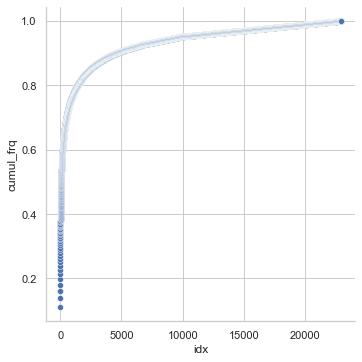

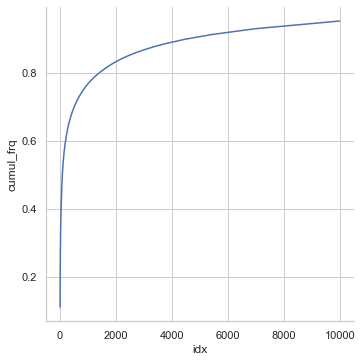

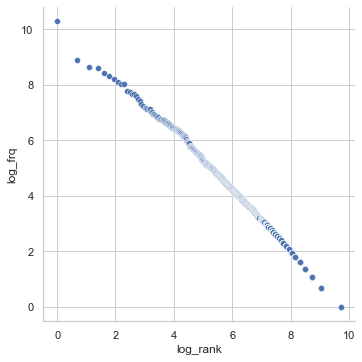

In [26]:
voc = collections.Counter(tokens)
frq = pandas.DataFrame(voc.most_common(), columns=['token', 'frequency'])

# Index in the sorted list
frq['idx'] = frq.index + 1

# Frequency normalised by corpus size
frq['norm_freq'] = frq.frequency / len(tokens)

# Cumulative normalised frequency
frq['cumul_frq'] = frq.norm_freq.cumsum()

seaborn.set_theme(style='whitegrid')

# Plot: Cumulative frequency by index
seaborn.relplot(x='idx', y='cumul_frq', data=frq)
plt.show()

# Plot: Cumulative frequency by index, top 10000 tokens
seaborn.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
plt.show()

# Plot: Log-log plot for Zipf's law
frq['log_frq'] = numpy.log(frq.frequency)
frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=False))
seaborn.relplot(x='log_rank', y='log_frq', data=frq)
plt.show()


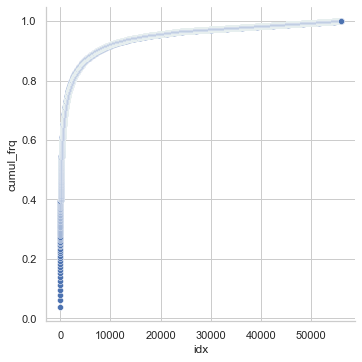

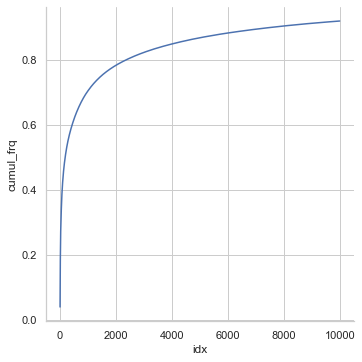

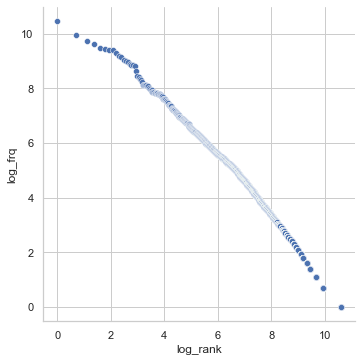

In [27]:
voc = collections.Counter(tokens1)
frq = pandas.DataFrame(voc.most_common(), columns=['token', 'frequency'])

# Index in the sorted list
frq['idx'] = frq.index + 1

# Frequency normalised by corpus size
frq['norm_freq'] = frq.frequency / len(tokens1)

# Cumulative normalised frequency
frq['cumul_frq'] = frq.norm_freq.cumsum()

seaborn.set_theme(style='whitegrid')

# Plot: Cumulative frequency by index
seaborn.relplot(x='idx', y='cumul_frq', data=frq)
plt.show()

# Plot: Cumulative frequency by index, top 10000 tokens
seaborn.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
plt.show()

# Plot: Log-log plot for Zipf's law
frq['log_frq'] = numpy.log(frq.frequency)
frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=False))
seaborn.relplot(x='log_rank', y='log_frq', data=frq)
plt.show()

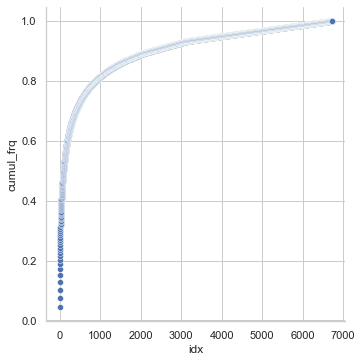

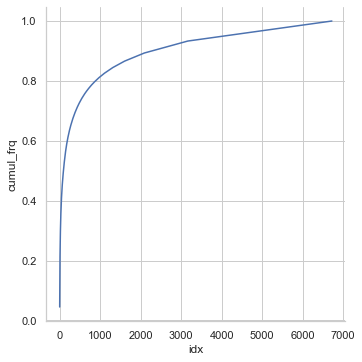

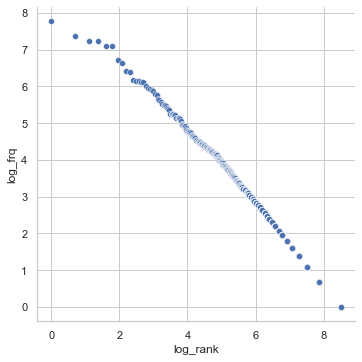

In [28]:
voc = collections.Counter(tokens2)
frq = pandas.DataFrame(voc.most_common(), columns=['token', 'frequency'])

# Index in the sorted list
frq['idx'] = frq.index + 1

# Frequency normalised by corpus size
frq['norm_freq'] = frq.frequency / len(tokens2)

# Cumulative normalised frequency
frq['cumul_frq'] = frq.norm_freq.cumsum()

seaborn.set_theme(style='whitegrid')

# Plot: Cumulative frequency by index
seaborn.relplot(x='idx', y='cumul_frq', data=frq)
plt.show()

# Plot: Cumulative frequency by index, top 10000 tokens
seaborn.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
plt.show()

# Plot: Log-log plot for Zipf's law
frq['log_frq'] = numpy.log(frq.frequency)
frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=False))
seaborn.relplot(x='log_rank', y='log_frq', data=frq)
plt.show()